<a href="https://colab.research.google.com/github/awchisholm/chi_material/blob/main/Data_Scientist_vs_Data_Engineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Original Google Trends search is here
# https://trends.google.com/trends/explore/TIMESERIES/1641721800?hl=en-GB&tz=0&date=all&geo=GB&q=data+scientist,data+engineer&sni=3
# This allows a CSV file to be created - the following URL is an example of the direct download link but this typically fails after a day or two
# https://trends.google.com/trends/api/widgetdata/multiline/csv?req=%7B%22time%22%3A%222004-01-01%202022-01-09%22%2C%22resolution%22%3A%22MONTH%22%2C%22locale%22%3A%22en-GB%22%2C%22comparisonItem%22%3A%5B%7B%22geo%22%3A%7B%22country%22%3A%22GB%22%7D%2C%22complexKeywordsRestriction%22%3A%7B%22keyword%22%3A%5B%7B%22type%22%3A%22BROAD%22%2C%22value%22%3A%22data%20scientist%22%7D%5D%7D%7D%2C%7B%22geo%22%3A%7B%22country%22%3A%22GB%22%7D%2C%22complexKeywordsRestriction%22%3A%7B%22keyword%22%3A%5B%7B%22type%22%3A%22BROAD%22%2C%22value%22%3A%22data%20engineer%22%7D%5D%7D%7D%5D%2C%22requestOptions%22%3A%7B%22property%22%3A%22%22%2C%22backend%22%3A%22IZG%22%2C%22category%22%3A0%7D%7D&token=APP6_UEAAAAAYdyS4xhOgO-xCUPzM0jlLRkqBe2aaW5V&tz=0
# So you need to download the CSV file and manually upload it to github ensuring you call it DataScienceDataEngineer.csv
# You can then use the raw github URL to download it


In [18]:
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/awchisholm/chi_material/main/DataScienceDataEngineer.csv'
csv_result = []
with requests.get(url, stream=True) as r:
  lines = (line.decode('utf-8') for line in r.iter_lines())
  for row in csv.reader(lines):
    csv_result.append(row)


In [19]:
columnnames = csv_result[2]
ts = pd.DataFrame(csv_result[3:], columns=columnnames)
ts['Month'] = pd.to_datetime(ts['Month'])
ts['data engineer: (United Kingdom)'] = pd.to_numeric(ts['data engineer: (United Kingdom)'])
ts['data scientist: (United Kingdom)'] = pd.to_numeric(ts['data scientist: (United Kingdom)'])

#ts.info()

In [20]:
# in case the direct approach fails
#import pandas as pd
#import matplotlib.pyplot as plt
#ts = pd.read_csv('/content/DataScienceDataEngineer.csv', parse_dates=['Month'])
#ts.info()

In [21]:
rollperiod = 6
ts['Data Scientist'] = ts['data scientist: (United Kingdom)'].rolling(rollperiod).mean()
ts['Data Engineer'] = ts['data engineer: (United Kingdom)'].rolling(rollperiod).mean()
#ts

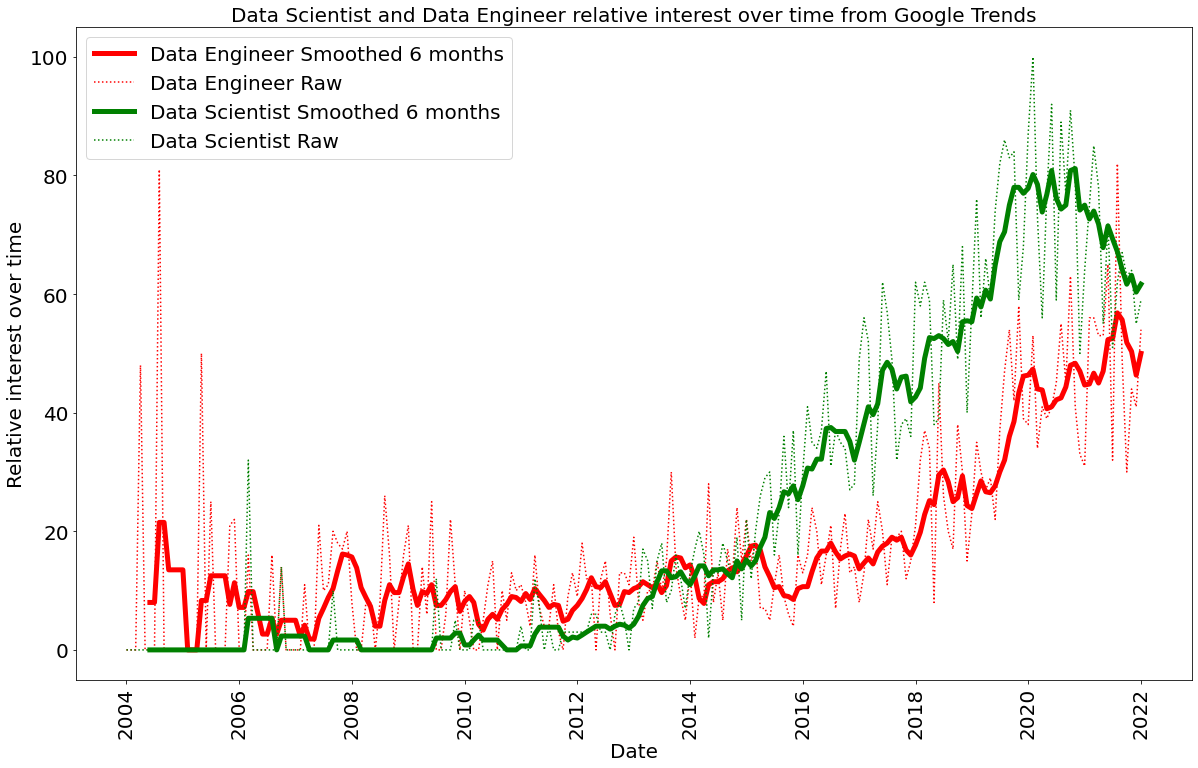

In [22]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
engcolor = 'red'
scicolor='green'
linewidth=5
fontsize = 20
plt.plot(ts['Month'], ts['Data Engineer'], color=engcolor, label='Data Engineer Smoothed ' + str(rollperiod) + ' months', linewidth=linewidth)
plt.plot(ts['Month'], ts['data engineer: (United Kingdom)'], linestyle='dotted', color=engcolor, label='Data Engineer Raw')

plt.plot(ts['Month'], ts['Data Scientist'], color=scicolor, label='Data Scientist Smoothed ' + str(rollperiod) + ' months',  linewidth=linewidth)
plt.plot(ts['Month'], ts['data scientist: (United Kingdom)'], linestyle='dotted', color=scicolor, label='Data Scientist Raw')

plt.title('Data Scientist and Data Engineer relative interest over time from Google Trends', fontsize=fontsize)
plt.xlabel('Date', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel('Relative interest over time', fontsize=fontsize)
plt.legend(fontsize=fontsize)

plt.show()